In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

file_path = '/Users/maengjuseog/Desktop/3-2/DeepLearningClass/abalone.csv'
abalone_df = pd.read_csv(file_path)


abalone_df.head()

df = pd.read_csv("/Users/maengjuseog/Desktop/3-2/DeepLearningClass/abalone.csv")
df


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

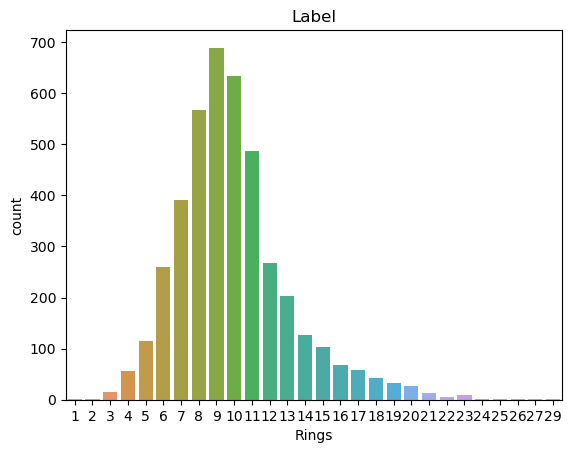

In [6]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("count")
plt.title("Label")

In [8]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [9]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

/var/folders/85/k4yp9vwd2wv_66s9g8k0qsvr0000gn/T/ipykernel_53742/1800717988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/85/k4yp9vwd2wv_66s9g8k0qsvr0000gn/T/ipykernel_53742/1800717988.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

<Axes: xlabel='Diameter', ylabel='Density'>

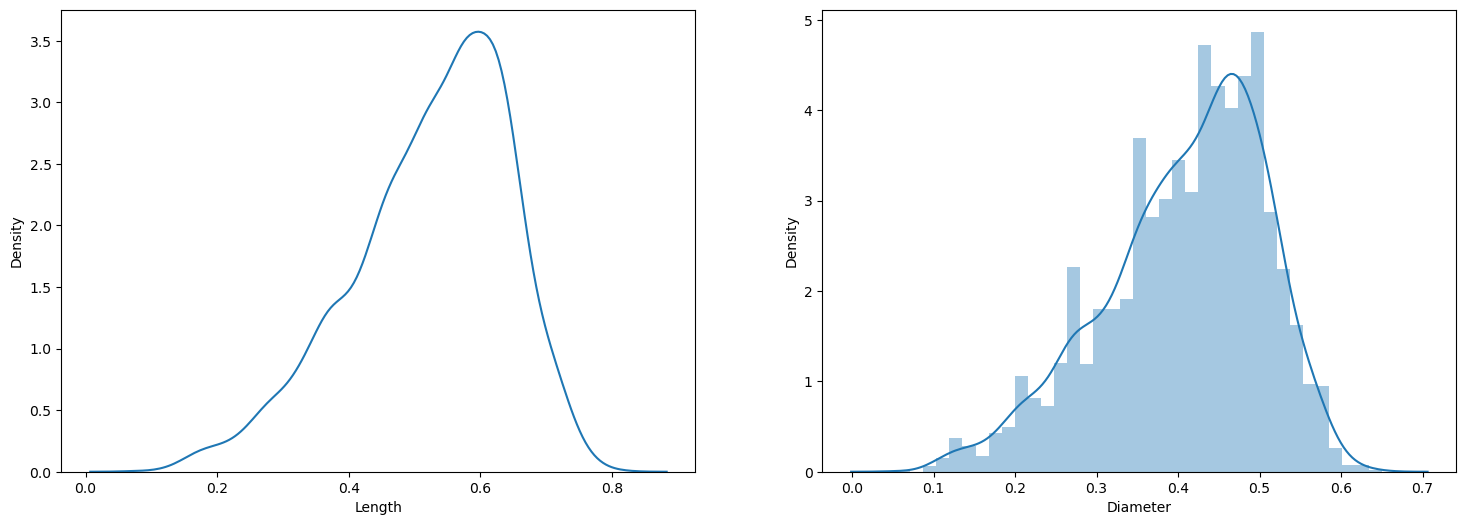

In [12]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
abalone_df['Sex'] = label_encoder.fit_transform(abalone_df['Sex'])

X = abalone_df.drop(['Rings', 'id'], axis=1)
y = abalone_df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
3141,1,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100
3521,1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125
883,2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530
3627,2,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305
2106,2,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.25598086124401914
[[ 0  3  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 22  3  0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 26 10  4  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25 23 18 31  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6 48 49  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 26 69 25  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 12 46 32 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 12 35 33 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 28 25  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 17 13  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 13  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  6  1  0  0  0  0  0  0  0  0  0  0 

In [29]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.26913875598086123
[[ 0  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 25  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 17 18  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 32 38 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  9 52 41  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 22 67 29  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 14 34 38 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 15 26 30 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 19 25 13  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7  3 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  9 10  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  2  6  3  0  0  0  0  0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2727272727272727
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 11 14  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7 20 10  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 23 27 25 18  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  2 15 44 42  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 21 72 21  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  9 44 34 14  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5  9 36 26 16  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2 26 19 13  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  5 18 12  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  7 11  2  0  3  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  9  5  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  5  3  0  2  0  0  0  0  0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [31]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.20095693779904306
[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  8 10  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 11 15  8  1  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 18 30 29 10  3  3  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8 16 28 22 19 10  0  3  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7 28 29 24 15  6  7  0  4  1  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 15 23 23 21  6  6  4  1  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 11 17 23 15  7  6  1  4  0  2  3  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  9 13 11  7  9  3  4  0  1  1  1  2  0  2  1  0  1  0  0]
 [ 0  0  0  0  0  1  8  6  9  5  2  3  0  1  1  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  3  2  4  3  5  0  2  1  2  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  1  1  3  0  1  2  2  2

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.23205741626794257
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 10  9  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 17 16  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 24 27 33  7  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  2 14 48 28 12  3  1  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 30 31 37 10  3  2  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 13 28 27 20  4  4  0  1  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  8 29 31 18  1  3  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 10 12 21 11  7  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7  9 11  4  0  2  0  0  1  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  6  7  4  1  0  2  2  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  5  4  3  1  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  2  2  1  2  1  1  1  0  1  0  0  0  0